In [18]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()

In [2]:
faria_lima=pd.read_excel('FARIA_LIMA.XLSX', names=['Data','Total','Ibirapuera','Pinheiros'])
vergueiro=pd.read_excel('VERGUEIRO.XLSX', names=['Data','Total','Bairro','Centro'])

faria_lima=faria_lima.melt('Data',['Ibirapuera','Pinheiros','Total'])
faria_lima['ciclo']= 'Faria Lima'

vergueiro=vergueiro.melt('Data',['Bairro','Centro','Total'])
vergueiro['ciclo'] = 'Vergueiro'

df = pd.concat([faria_lima,vergueiro])
df.columns=['Data', 'Sentido','Qtde.','Local']

In [3]:
df = df.set_index('Data')
total = df[df.Sentido == 'Total']

In [4]:
print(f"Total de viagens: {'{:,}'.format(int(total['Qtde.'].sum()))}")
print(f"Total de dias: {len(set(total.index.date))}")
print(f"Análise pegou as viagens entre {total.index.date.min().strftime('%d/%m/%Y')} e {total.index.date.max().strftime('%d/%m/%Y')}")
print(f"Total de viagens/dia: {'{:.2f}'.format(total['Qtde.'].sum()/len(set(total.index.date)))}")

Total de viagens: 4,093,600
Total de dias: 924
Análise pegou as viagens entre 20/01/2016 e 31/07/2018
Total de viagens/dia: 4430.30


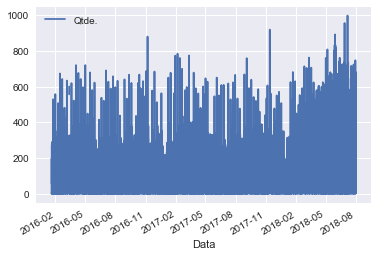

In [5]:
total.plot(y='Qtde.')

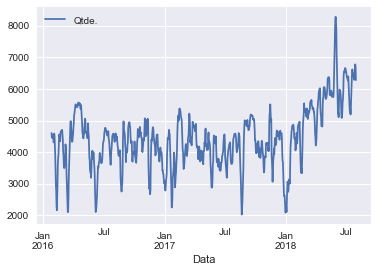

In [6]:
#média móvel de 7 dias
total.resample('D').sum().rolling(7).mean().plot()

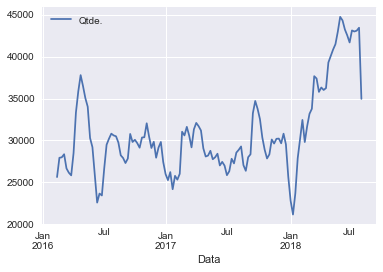

In [7]:
#média móvel de 4 semanas
total.resample('W').sum().rolling(4).mean().plot()

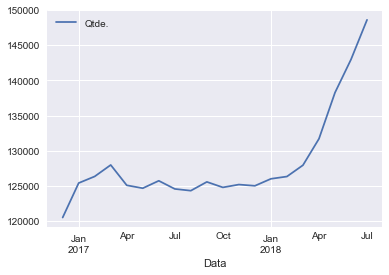

In [8]:
#média móvel de 12 meses
total.resample('M').sum().rolling(12).mean().plot()

## Quais as horas do dia com mais e menos ciclistas?

In [9]:
total.groupby(total.index.time).sum().sort_values('Qtde.', ascending=False)

,Qtde.
18:00:00,"367,189.00"
19:00:00,"319,174.00"
09:00:00,"316,927.00"
08:00:00,"309,754.00"
17:00:00,"281,981.00"
10:00:00,"266,678.00"
11:00:00,"253,539.00"
12:00:00,"247,312.00"
20:00:00,"228,112.00"
16:00:00,"227,568.00"


In [10]:
total_pivot = total.reset_index().pivot_table(index='Data', columns='Local', values='Qtde.',fill_value=0)

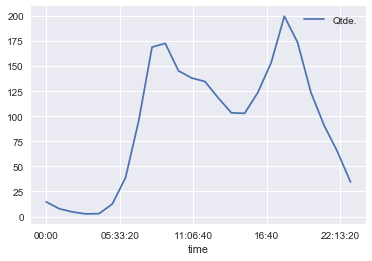

In [11]:
total.groupby(total.index.time).mean().plot()

In [13]:
faria_lima = df[df.Local == 'Faria Lima']

In [14]:
faria_lima.groupby(faria_lima.index.time).mean().sort_values('Qtde.', ascending=False)

,Qtde.
18:00:00,171.23
09:00:00,166.08
08:00:00,161.27
19:00:00,148.69
10:00:00,132.83
11:00:00,125.63
12:00:00,123.53
17:00:00,122.77
13:00:00,104.32
20:00:00,98.11


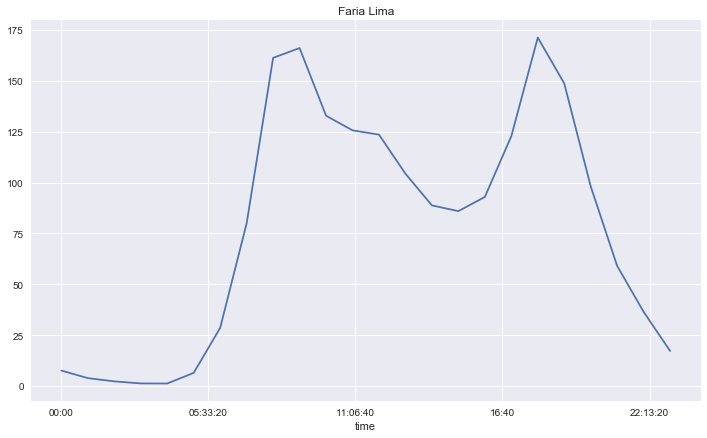

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
plt.plot(faria_lima.groupby(faria_lima.index.time).mean())
plt.title('Faria Lima')
fig.savefig('faria_lima.jpeg')

In [15]:
vergueiro = df[df.Local == 'Vergueiro']

In [16]:
vergueiro.groupby(vergueiro.index.time).mean().sort_values('Qtde.', ascending=False)

,Qtde.
18:00:00,94.89
19:00:00,82.63
17:00:00,81.66
16:00:00,72.11
20:00:00,67.27
09:00:00,63.92
08:00:00,63.78
21:00:00,62.35
10:00:00,60.74
11:00:00,58.41


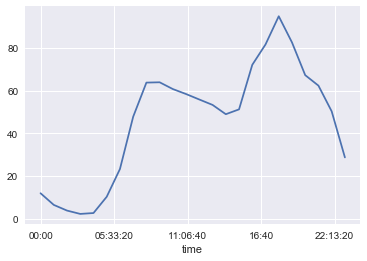

In [17]:
vergueiro.groupby(vergueiro.index.time).mean()['Qtde.'].plot()

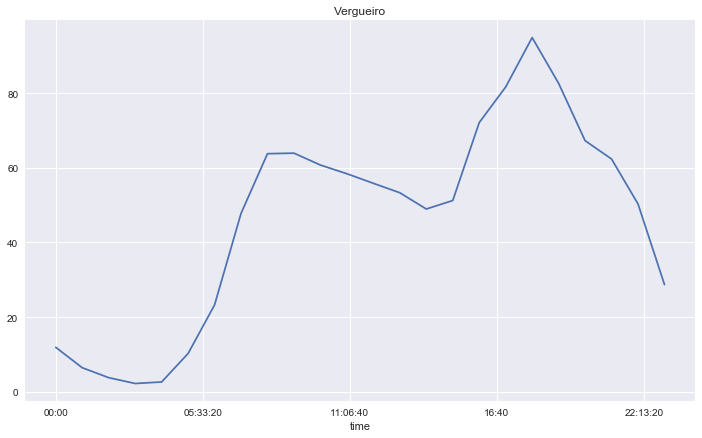

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
plt.plot(vergueiro.groupby(vergueiro.index.time).mean())
plt.title('Vergueiro')
fig.savefig('vergueiro.jpeg')

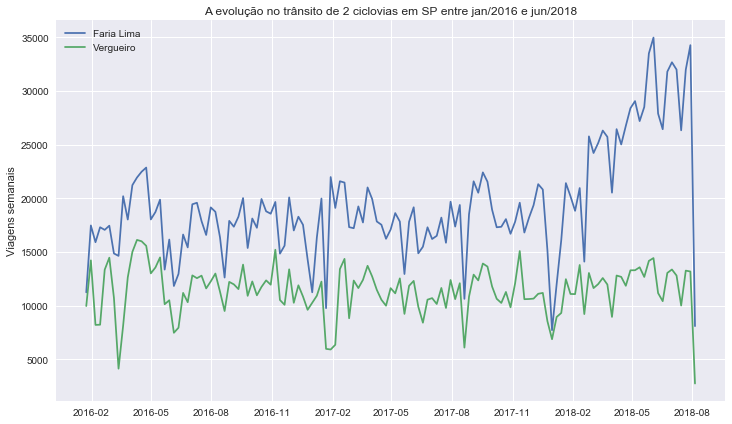

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
plt.plot(total.reset_index().pivot_table(values='Qtde.',index='Data',columns=['Local'],aggfunc='sum').resample('W').sum())
plt.ylabel('Viagens semanais')
plt.title('A evolução no trânsito de 2 ciclovias em SP entre jan/2016 e jun/2018')
ax.legend(['Faria Lima','Vergueiro'])
fig.savefig('evolucao.jpeg');

In [58]:
evolucao = total.reset_index().pivot_table(values='Qtde.',index='Data',columns=['Local'],aggfunc='sum').resample('M').sum()

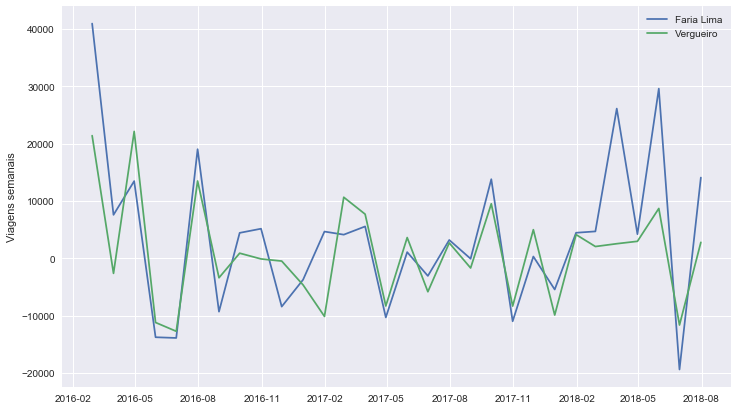

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
plt.plot(evolucao.diff())
plt.ylabel('Viagens semanais')
ax.legend(['Faria Lima','Vergueiro'])
fig.savefig('diff.jpeg');

In [119]:
#evolucao.pct_change()
evolucao.diff()

Local,Faria Lima,Vergueiro
Data,,
2016-01-31,nan,nan
2016-02-29,"40,915.00","21,383.00"
2016-03-31,"7,581.00","-2,621.00"
2016-04-30,"13,460.00","22,120.00"
2016-05-31,"-13,753.00","-11,184.00"
2016-06-30,"-13,880.00","-12,719.00"
2016-07-31,"19,021.00","13,478.00"
2016-08-31,"-9,297.00","-3,390.00"
2016-09-30,"4,436.00",894.00


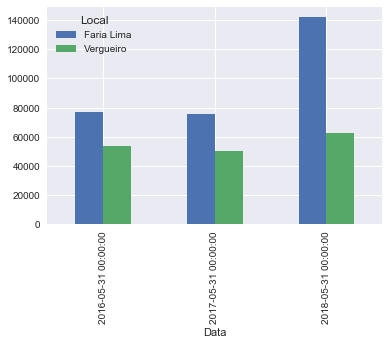

In [84]:
evolucao[evolucao.index.month==5].plot.bar()

In [121]:
evolucao[evolucao.index.month==5].pct_change()

Local,Faria Lima,Vergueiro
Data,,
2016-05-31,nan,nan
2017-05-31,-0.02,-0.06
2018-05-31,0.89,0.24


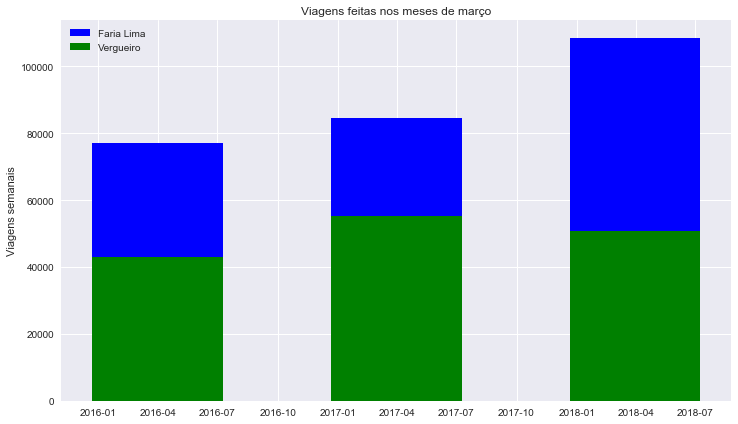

In [117]:
cores = ['b','g']
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
plt.ylabel('Viagens semanais')
plt.title('Viagens feitas nos meses de março')
for avenida,cor in zip(evolucao[evolucao.index.month==3].columns,cores):
    ax.bar(evolucao[evolucao.index.month==3].index, evolucao[evolucao.index.month==3][avenida],width=200,color=cor,align='center')
ax.legend(['Faria Lima','Vergueiro'])
fig.savefig('marco.jpeg');

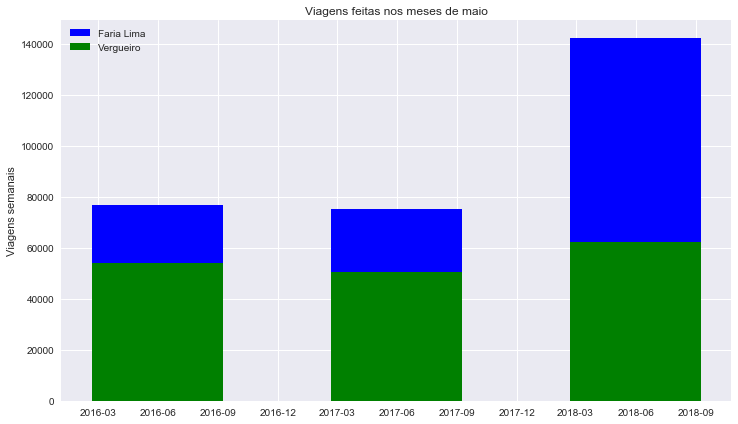

In [118]:
cores = ['b','g']
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
plt.ylabel('Viagens semanais')
plt.title('Viagens feitas nos meses de maio')
for avenida,cor in zip(evolucao[evolucao.index.month==5].columns,cores):
    ax.bar(evolucao[evolucao.index.month==5].index, evolucao[evolucao.index.month==5][avenida],width=200,color=cor,align='center')
ax.legend(['Faria Lima','Vergueiro'])
fig.savefig('maio.jpeg');

Em casa mês, quais são as horas com mais e menos ciclistas?

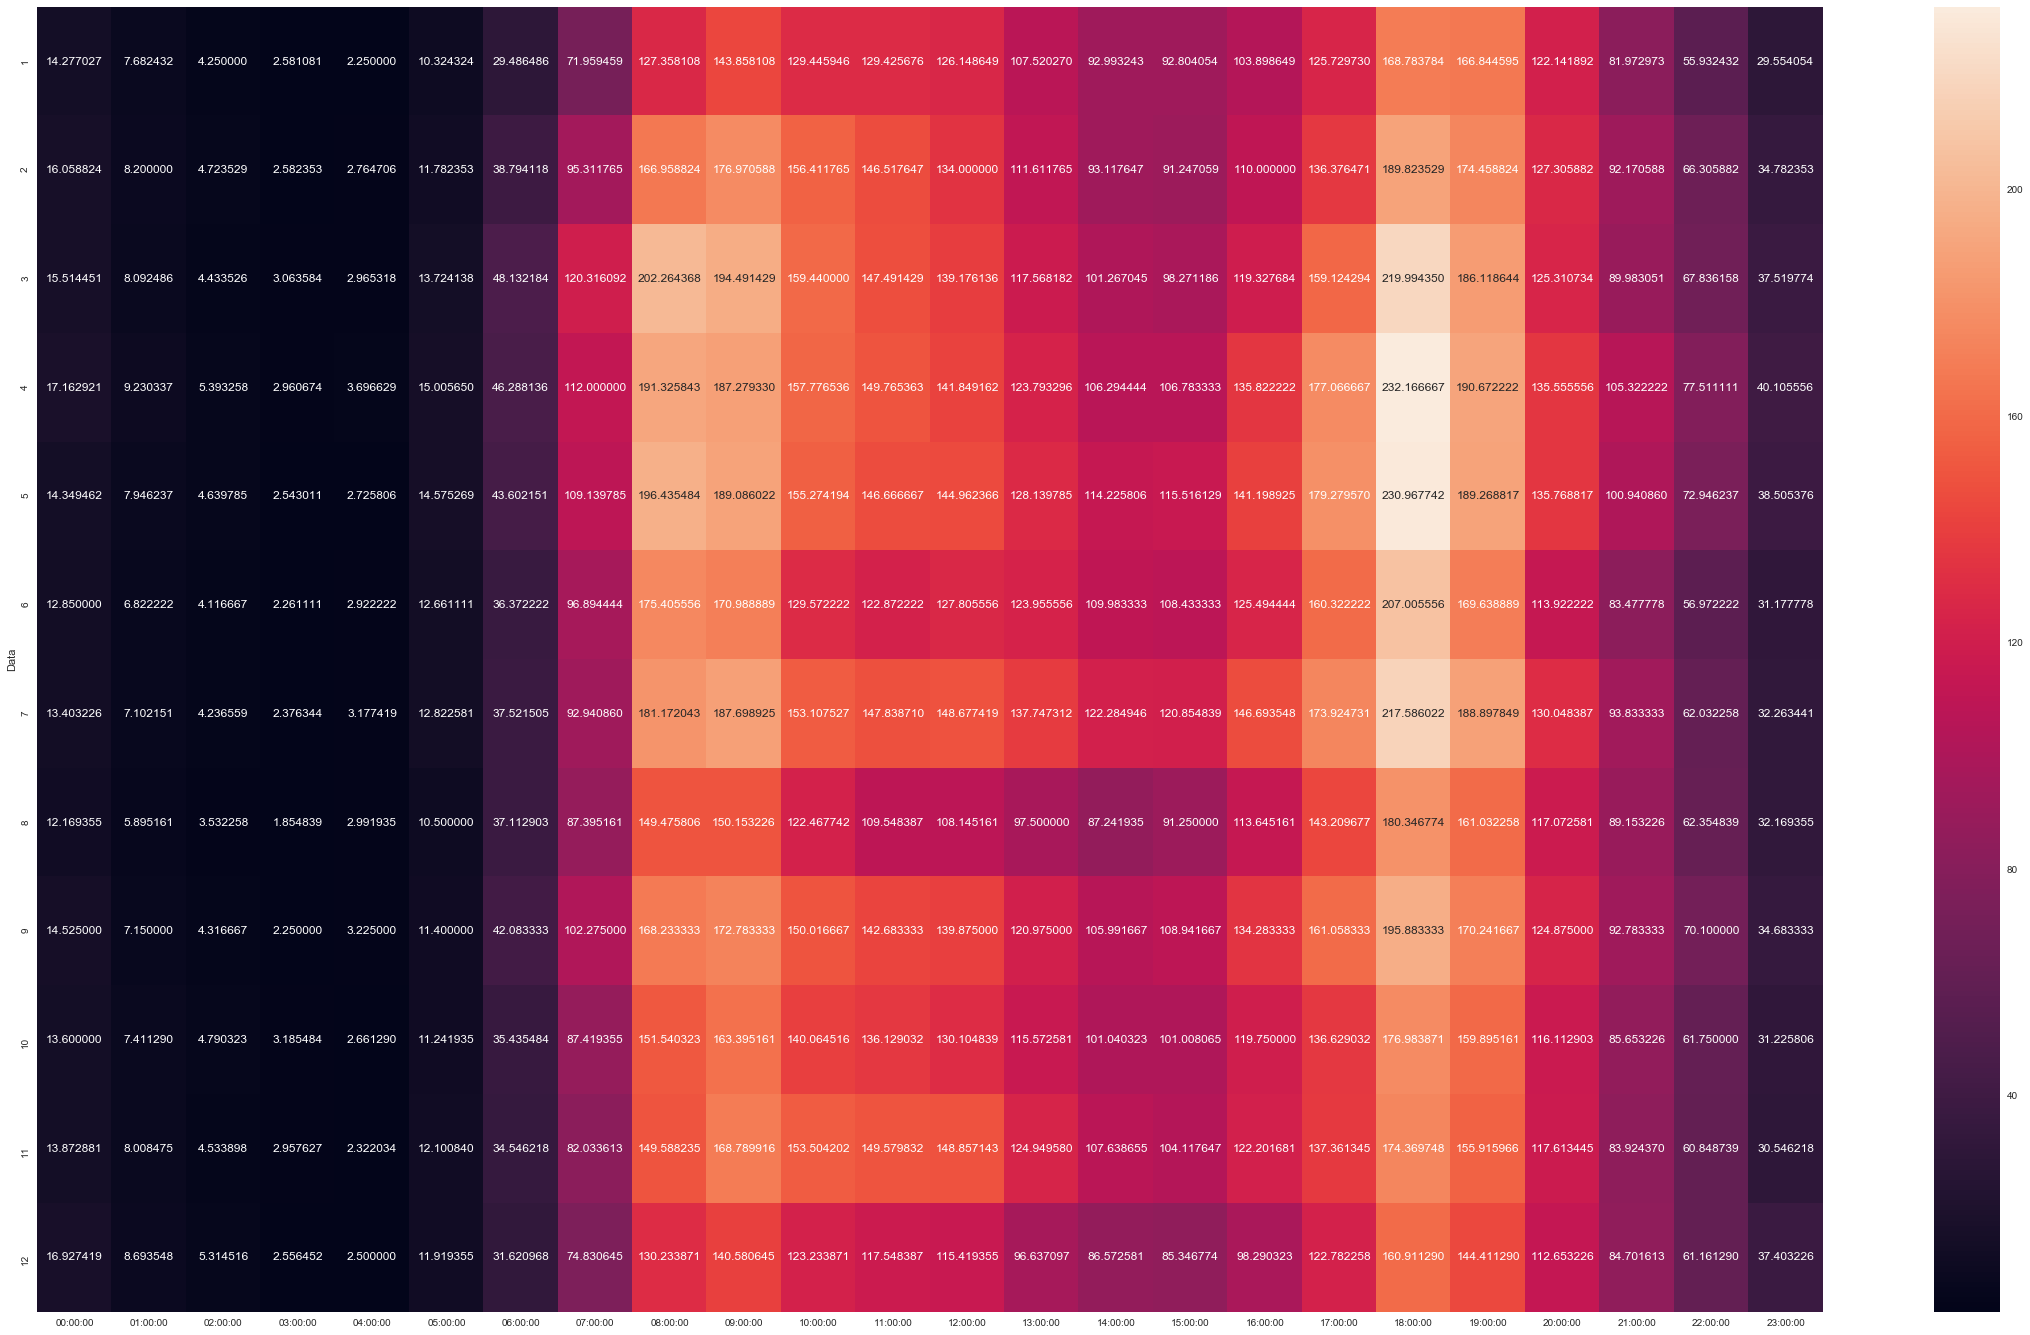

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(40, 24)
heatmap_bike = sns.heatmap(total.pivot_table(values='Qtde.', aggfunc='mean', index=total.index.month, columns=total.index.time), annot=True,fmt='f')
fig.savefig('heatmap_bike.jpeg')

E a relação dia/horário?

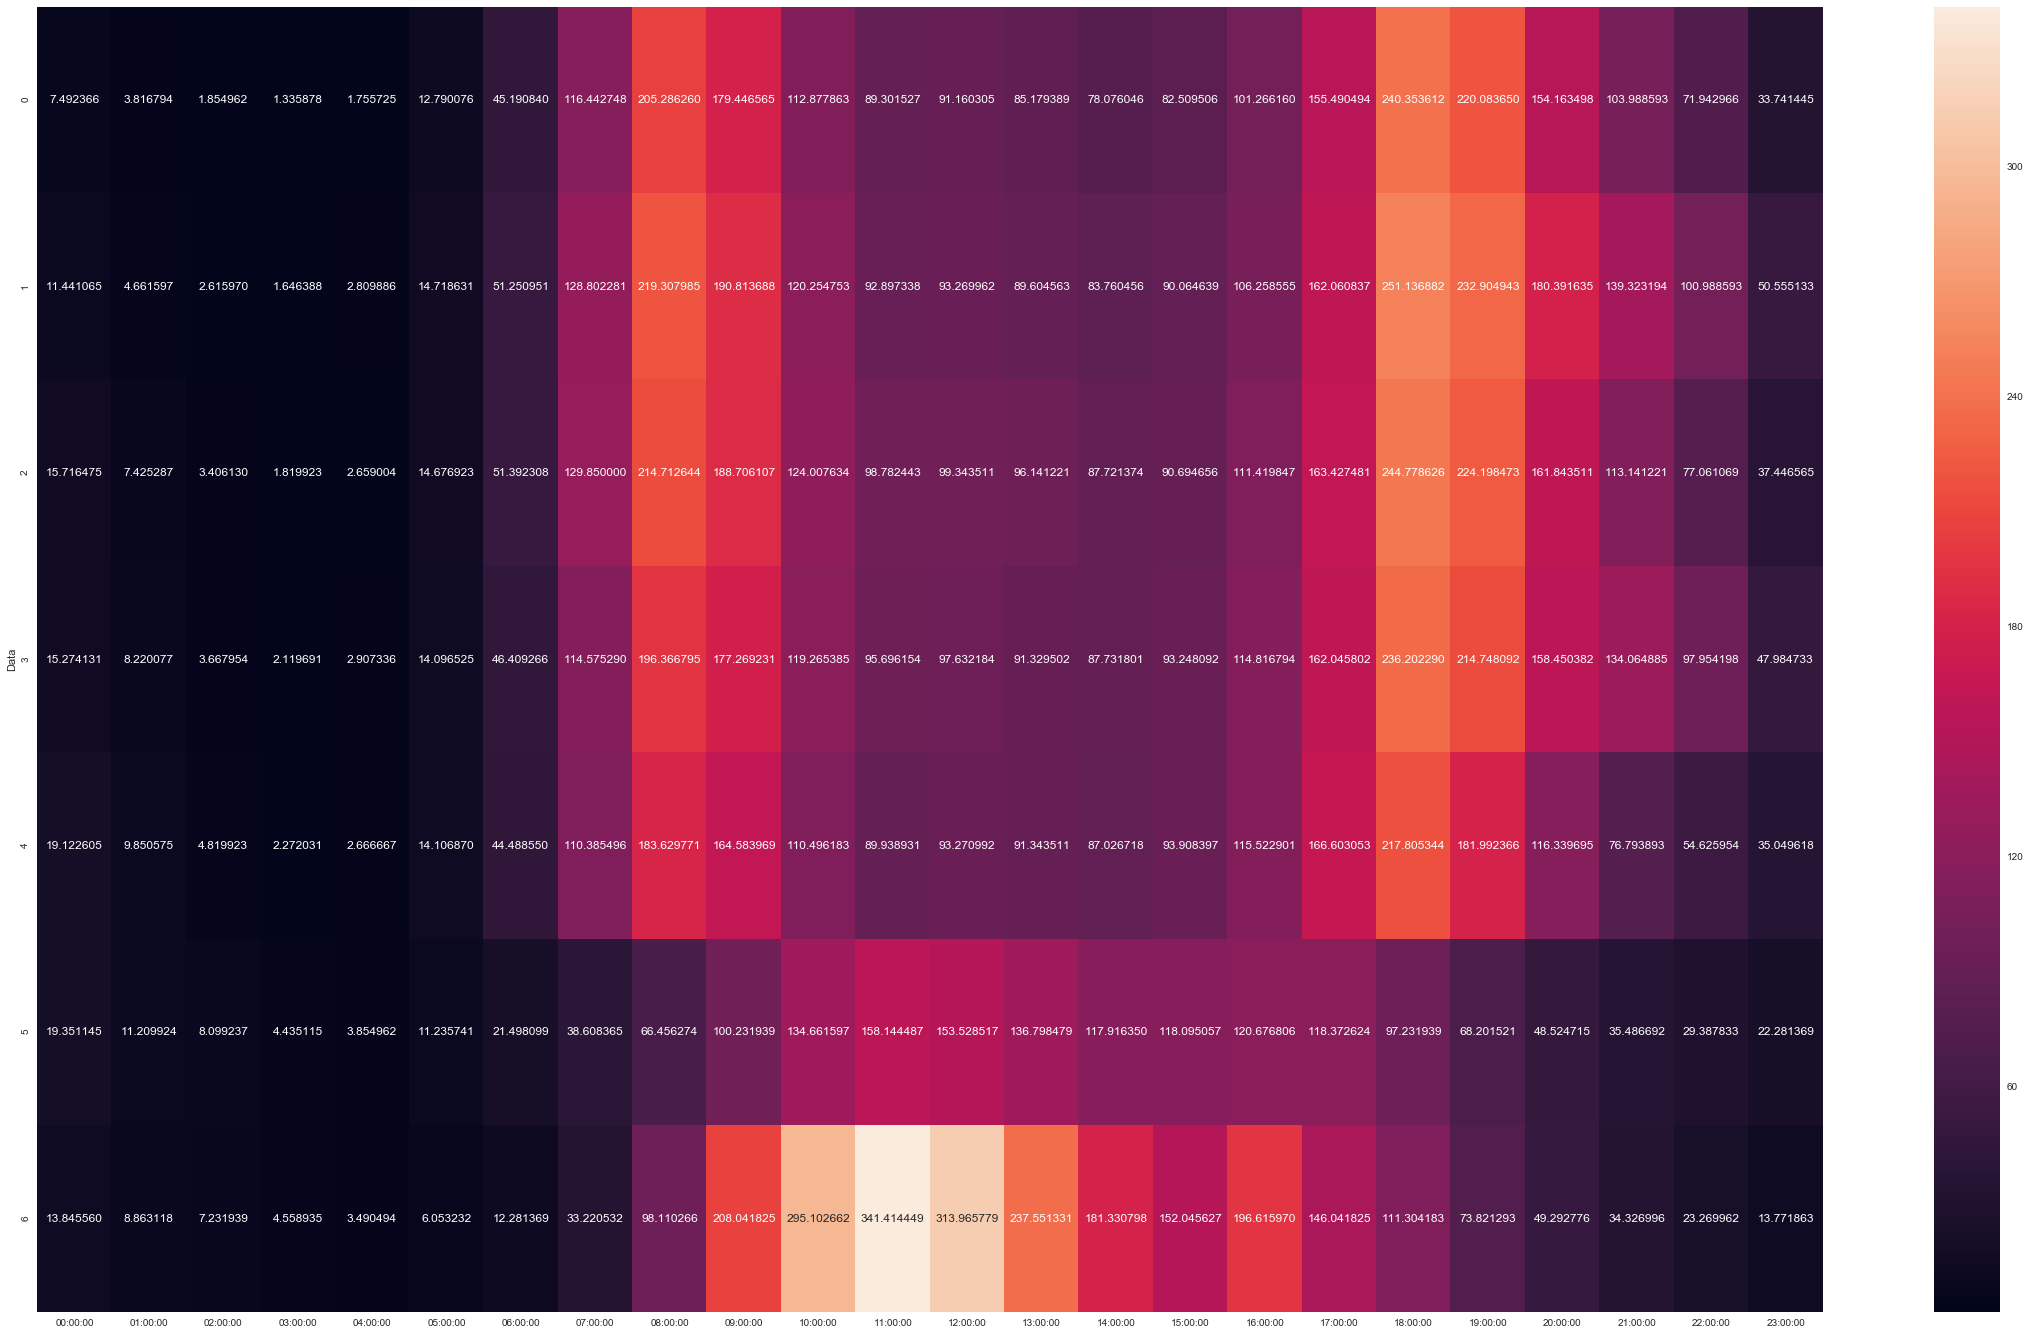

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(40, 24)
heatmap_bike = sns.heatmap(total.pivot_table(values='Qtde.', aggfunc='mean', index=total.index.dayofweek, columns=total.index.time), annot=True,fmt='f')
fig.savefig('heatmap_dia_hora.jpeg')

E se considerássemos todos os dias do ano?

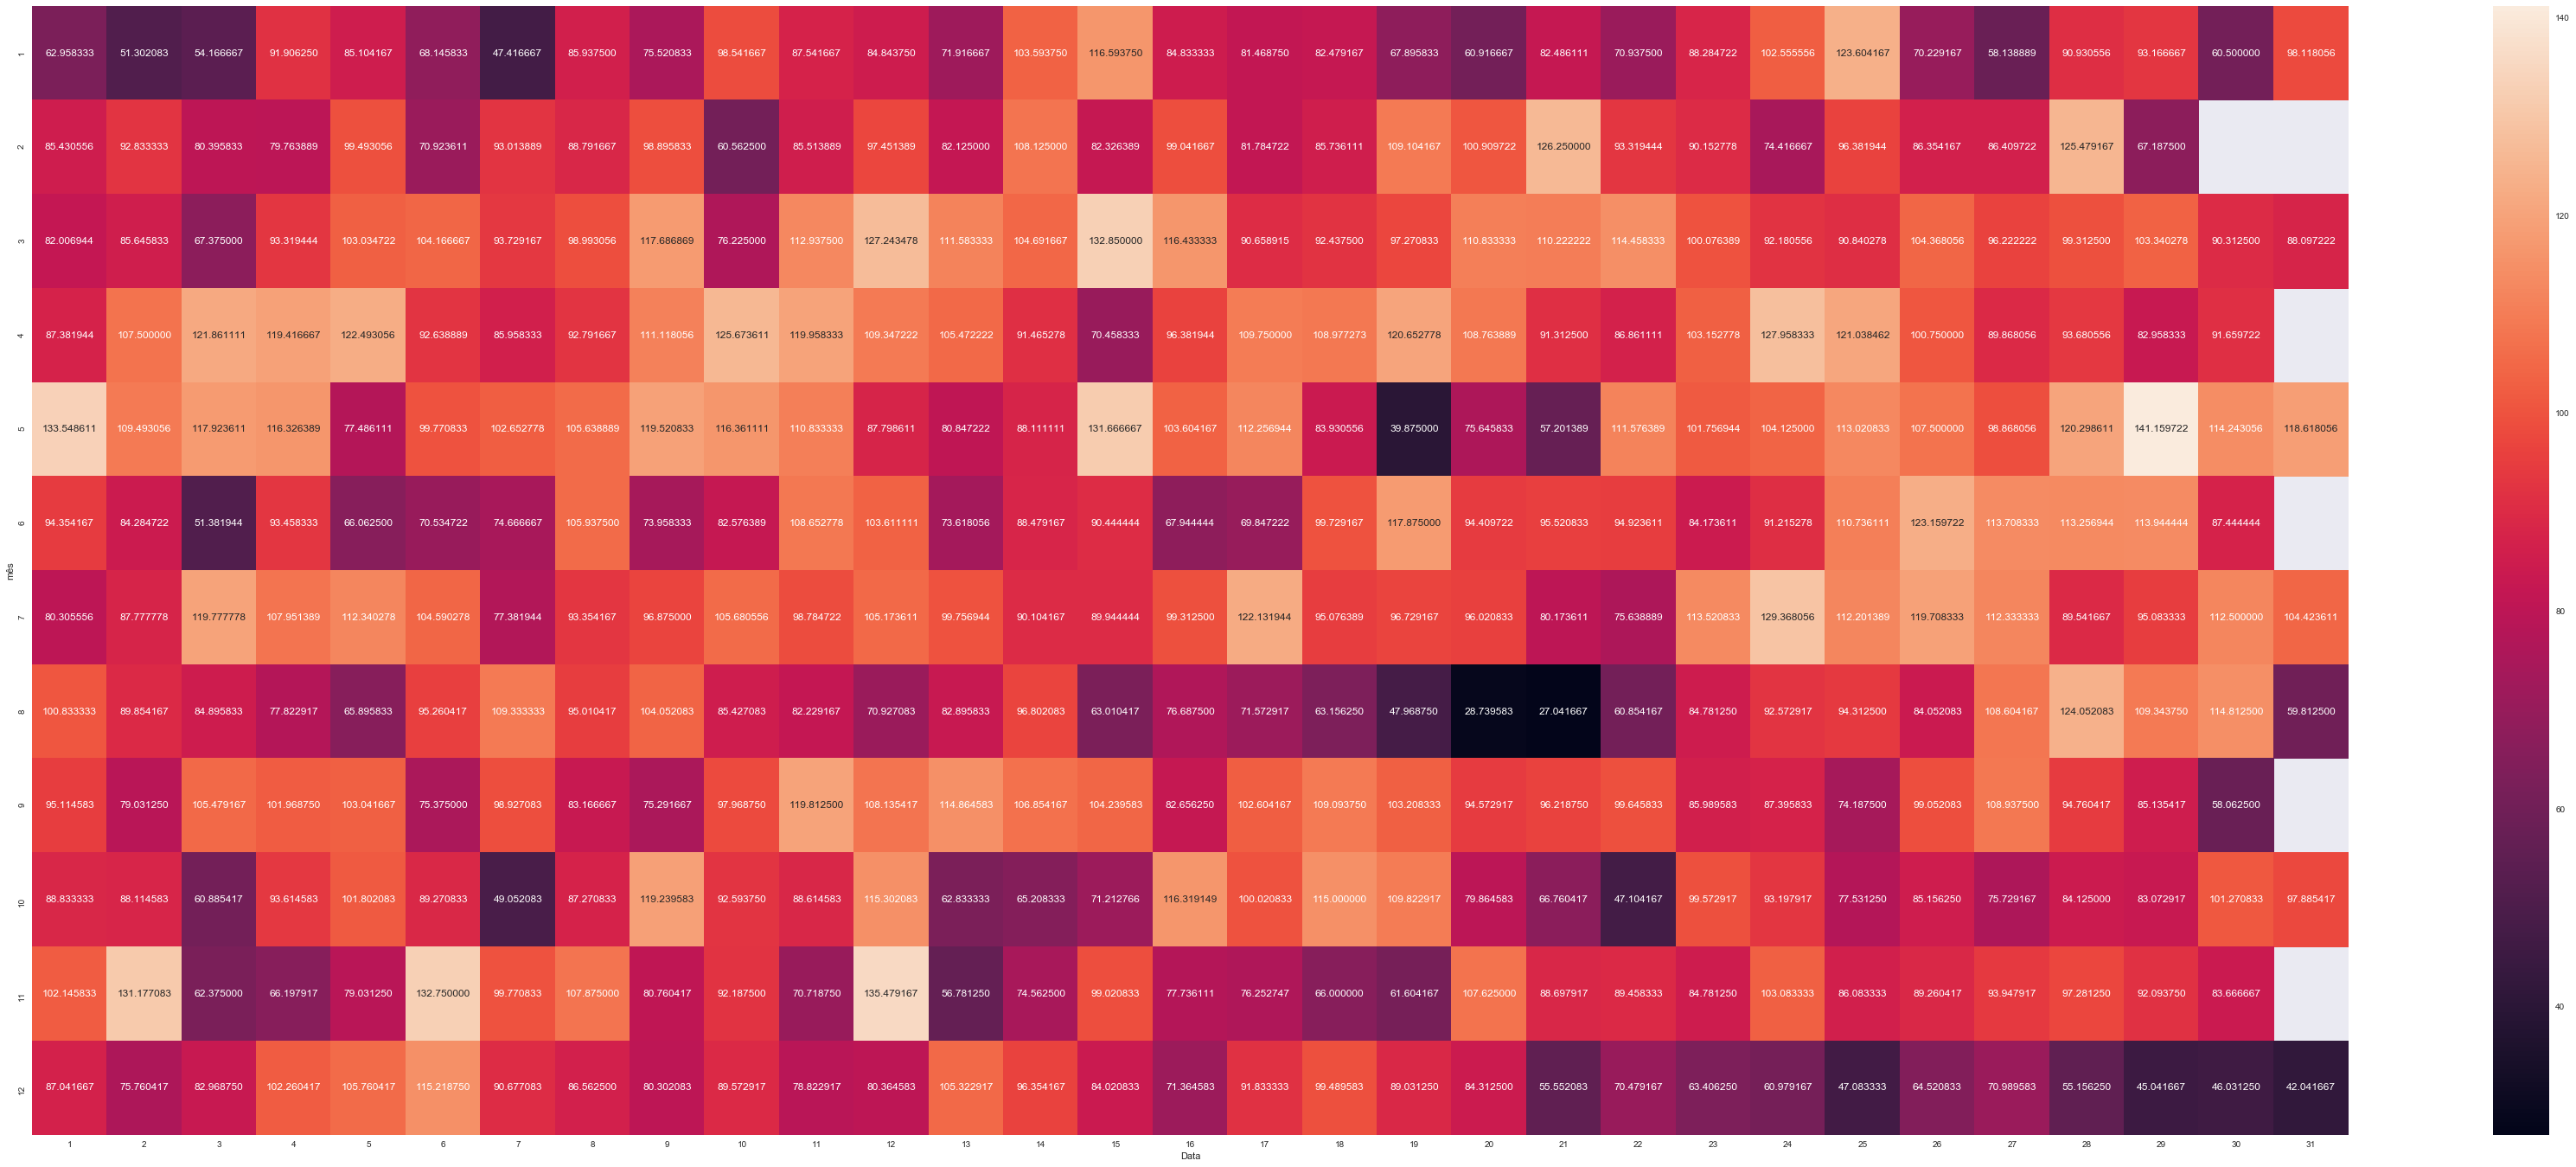

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(60, 24)
heatmap_bike = sns.heatmap(total.pivot_table(values='Qtde.', aggfunc='mean', index=total.index.month.set_names('mês'), columns=total.index.day), annot=True,fmt='f')
fig.savefig('heatmap_dias.jpeg')